In [79]:
import pandas as pd
import numpy as np
df= pd.read_csv('Test.csv',sep=';')
df=df.drop('tweet_id',axis=1)
print(df)
t=df['sentiment']
print(t)
#t=np.zeros((15651, 1))
#t=df['text']
#print(t)


      sentiment                                               text
0       neutral  Picturehouse's, Pink Floyd's, 'Roger Waters: T...
1       neutral  Order Go Set a Watchman in store or through ou...
2       neutral  If you could ask an onstage interview question...
3      positive  A portion of book sales from our Harper Lee/Go...
4      positive  Excited to read "Go Set a Watchman" on Tuesday...
...         ...                                                ...
15646   neutral  @ShaquilleHoNeal from what I think you're aski...
15647  positive  Iran ranks 1st in liver surgeries, Allah bless...
15648   neutral  Hours before he arrived in Saudi Arabia on Tue...
15649  negative  @VanityFair  Alex Kim Kardashian worth how to ...
15650   neutral  I guess even Pandora knows Justin Bieber is a ...

[15651 rows x 2 columns]
0         neutral
1         neutral
2         neutral
3        positive
4        positive
           ...   
15646     neutral
15647    positive
15648     neutral
15649   

In [80]:
pip install TextBlob


Note: you may need to restart the kernel to use updated packages.


In [81]:
from textblob import TextBlob
def sentiment_calc(text):
    try:
        analysisPol=TextBlob(text).sentiment.polarity
        if analysisPol > 0:
            return('positive')
        elif analysisPol == 0:
            return('neutral')
        else:
            return('negative')
    
    except:
        return None
k=np.zeros((15651, 1))
k= df['text'].apply(sentiment_calc)
print(k)


0        negative
1        negative
2         neutral
3        positive
4        positive
           ...   
15646     neutral
15647     neutral
15648    negative
15649    positive
15650     neutral
Name: text, Length: 15651, dtype: object


In [82]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [83]:
import sklearn
sklearn.metrics.accuracy_score(t,k)

0.48942559580857453

In [93]:
from sklearn.metrics import precision_score
precision = precision_score(t,k,average= 'macro')
print('Precision: %.3f' % precision)

Precision: 0.468


In [94]:
from sklearn.metrics import recall_score
recall = recall_score(t, k, average='macro')
print('Recall: %.3f' % recall)

Recall: 0.491


In [95]:
from sklearn.metrics import f1_score
score = f1_score(t,k, average='macro')
print('F-Measure: %.3f' % score)

F-Measure: 0.463


In [97]:
from sklearn.metrics import confusion_matrix
e=sklearn.metrics.confusion_matrix(t,k)
print(e)

[[ 979  635  696]
 [1654 3069 3116]
 [ 635 1255 3612]]


In [100]:
df_confusion = pd.crosstab(t,k, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

Predicted  negative  neutral  positive    All
Actual                                       
negative        979      635       696   2310
neutral        1654     3069      3116   7839
positive        635     1255      3612   5502
All            3268     4959      7424  15651


<AxesSubplot:>

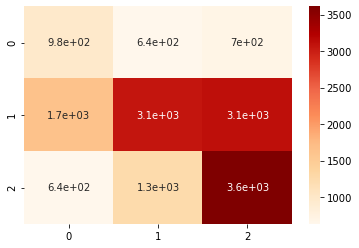

In [109]:
import numpy as np
import seaborn as sns
cf_matrix = np.array([[979, 635,696],
                      [1654,3069, 3116],
                      [635, 1255, 3612]])

sns.heatmap(cf_matrix,annot=True,cmap='OrRd') 



In [102]:
pip install seaborn

     |████████████████████████████████| 285 kB 562 kB/s eta 0:00:01    |█████████▏                      | 81 kB 616 kB/s eta 0:00:01     |█████████████████▎              | 153 kB 562 kB/s eta 0:00:01     |████████████████████████████▊   | 256 kB 562 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
